# Neural Network Classification in TensorFlow

## Import Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

tf.__version__

'2.9.1'

## Input and Output Shapes
(for an image classification example)

```
Image (224x224x3) [batch_size, width, height, color_channels]->Inputs->Machine Learning Algorithm->Outputs (1xnum_classes) [prediction probabilities]
```
```
# 1. Create a model (specific to your problem)
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape = (224,224,3)),
        tf.keras.layers.Dense(100, activation = "relu"),
        tf.keras.layers.Dense(3, activation = "softmax")
    ]
)

# 2. Compile the model
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ["accuracy"])

# 3. Fit the model
model.fit(X_train, y_train, epochs = 5)

# 4. Evaluate the model
model.evaluate(X_test, y_test)
```

|Hyperparameter|Binary Classification|Multiclass Classification|
|--------------|---------------------|-------------------------|
|Input layer shape|Same as the number of features (eg 5 for age, sex, height, weight, smoking status in heart disease prediction)|Same as binary classification|
|Hidden layer(s)|Problem specific, minimum = 1, maximum = unlimited|Same as binary classification|
|Neurons per hidden layer|Problem specific, generally 10 to 100|Same as binary classification|
|Output layer shape|1 (one class or the other)|1 per class (eg 3 for food, person or dog photos)|
|Hidden activation|Usually ReLU (rectified linear unit)|Same as binary classification|
|Output activation|Sigmoid|Softmax|
|Loss function|Cross entropy (tf.keras.losses.BinaryCrossentropy in TensorFlow)|Cross entropy (tf.keras.losses.CategoricalCrossentropy in TensorFlow)|
|Optimizer|SGD (stochastic gradient descent)|Same as binary classification|

A classification is where you try to classify something as one thing and/or another

A few types of classification:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles
# Make 1000 examples
n_samples = 1000
X, y = make_circles(
    n_samples,
    noise = 0.03,
    random_state=42
)

Our data is a little hard to understand right now. Lets visualize it

In [4]:
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


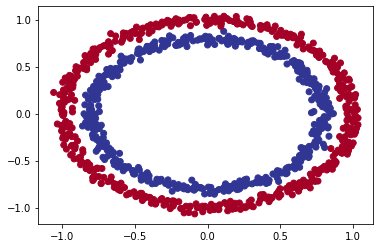

In [6]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu);

**Note:** We can use [TensorFlow Playground](http://playground.tensorflow.org/) to quickly model our neural network.

## Input and Output Shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1, activation = "sigmoid", input_shape = (2,), name = "output_layer")
    ], name = "simple_model"
)

# 2. Compile the model
model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 3e-4),
    metrics = ["accuracy"]
)

# 3. Fit the model
model_1.fit(X,y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 9ms/step - loss: 0.7056 - accuracy: 0.5010
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7053 - accuracy: 0.5010
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7050 - accuracy: 0.5010
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7047 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7044 - accuracy: 0.5010


In [11]:
# Lets try and and improve our model by training for longer
model_1.fit(X, y, epochs = 200, verbose = 0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5020


[0.6931712627410889, 0.5019999742507935]

With an accuracy of ~50% it appears like our model is guessing.

Lets step things up a notch and add an extra layer.

In [15]:
# Set a random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10, input_shape = (2,), name = "hidden_layer"),
        tf.keras.layers.Dense(1, name = "output_layer")
    ], name = "model_2"
)

# 2. Compile the model
model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 3e-4),
    metrics = ["accuracy"]
)

# 3. Fit the model
model_2.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 9ms/step - loss: 4.3095 - accuracy: 0.4580
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2233 - accuracy: 0.4570
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1097 - accuracy: 0.4560
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0002 - accuracy: 0.4620
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 3.8190 - accuracy: 0.4680
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 3.7468 - accuracy: 0.4660
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 3.7300 - accuracy: 0.4660
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 3.7144 - accuracy: 0.4650
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 3.6896 - accuracy: 0.4660
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 3.6398 - accuracy: 0.4680
Epoch 11/

In [16]:
# 4. Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5150


[0.6931594610214233, 0.5149999856948853]

Yeah this doesn't look so good.

In [18]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

In [19]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100, input_shape = (2,), name = "hidden_layer_1"), # add a 100 dense neurons
        tf.keras.layers.Dense(10, name = "hidden_layer_2"), # another layer with 10 neurons
        tf.keras.layers.Dense(1, name = "output_layer") 
    ], name = "model_3"
)

# 2. Compile the model
model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 3e-4),
    metrics = ["accuracy"]
)

# 3. Fit the model
model_3.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 13ms/step - loss: 4.2086 - accuracy: 0.4300
Epoch 2/100
32/32 [==============================] - 0s 10ms/step - loss: 4.0658 - accuracy: 0.4150
Epoch 3/100
32/32 [==============================] - 0s 9ms/step - loss: 3.9799 - accuracy: 0.4130
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: 3.7371 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 9ms/step - loss: 3.5319 - accuracy: 0.4390
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 2.5634 - accuracy: 0.4780
Epoch 7/100
32/32 [==============================] - 0s 8ms/step - loss: 0.8814 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 9ms/step - loss: 0.8334 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 9ms/step - loss: 0.8152 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 9ms/step - loss: 0.7994 - accuracy: 0.5000
Epoch 1

In [20]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 1s 12ms/step - loss: 0.6932 - accuracy: 0.5350


[0.6932017207145691, 0.5350000262260437]

To visualize our model's predictions, lets create a function `plot_decision_boundary()`. This function will:

* Take in a trained mode, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between the zones (where each unique class falls)

In [24]:
def plot_decision_boundary(model, X, y):
    """
    Plots decision boundary created by a model predicting on X.
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    y_pred = model.predict(x_in)
    # Check for multi-class classification
    if len(y_pred[0]) > 1:
        print("Multiclass classification")
        y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
    else:
        print("Binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    return

313/313 [==============================] - 1s 4ms/step
Binary classification


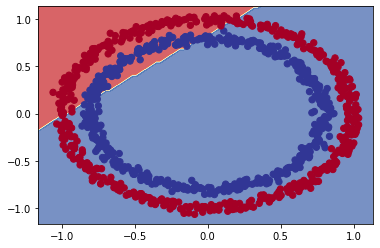

In [25]:
# Check the decisions our model is making
plot_decision_boundary(
    model = model_3,
    X = X,
    y = y
)

Whoops! Looks like this is the problem. Our model is trying to draw a straight line through the data!

In [29]:
# Lets see if our model can be used for a regression problem

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150][..., tf.newaxis]
X_reg_test = X_regression[150:][..., tf.newaxis]
y_reg_train = X_regression[:150][..., tf.newaxis]
y_reg_test = X_regression[150:][..., tf.newaxis]

# Fit our model to the regression data
# We can't because input shape is defined but if we hadn't then the following line would work.
model_3.fit(X_reg_train, y_reg_train, epochs = 100)

Epoch 1/100


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

Lets change up the model a bit

In [30]:
# Setup a random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100, name = "hidden_layer_1"),
        tf.keras.layers.Dense(10, name = "hidden_layer_2"),
        tf.keras.layers.Dense(1, name = "output_layer")
    ], name ="model_3_regression"
)

# 2. compile the model
model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 3e-4),
    metrics = ["mae"]
)

# 3. Fit the model
model_3.fit(X_reg_train, y_reg_train, epochs = 100)

Epoch 1/100
5/5 [==============================] - 1s 14ms/step - loss: 175.0469 - mae: 175.0469
Epoch 2/100
5/5 [==============================] - 0s 21ms/step - loss: 142.7220 - mae: 142.7220
Epoch 3/100
5/5 [==============================] - 0s 18ms/step - loss: 111.6871 - mae: 111.6871
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 79.9140 - mae: 79.9140
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 47.6501 - mae: 47.6501
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 13.9854 - mae: 13.9854
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 14.7173 - mae: 14.7173
Epoch 8/100
5/5 [==============================] - 0s 8ms/step - loss: 20.5618 - mae: 20.5618
Epoch 9/100
5/5 [==============================] - 0s 9ms/step - loss: 10.1260 - mae: 10.1260
Epoch 10/100
5/5 [==============================] - 0s 7ms/step - loss: 5.5044 - mae: 5.5044
Epoch 11/100
5/5 [==============================] - 

2/2 [==============================] - 0s 4ms/step


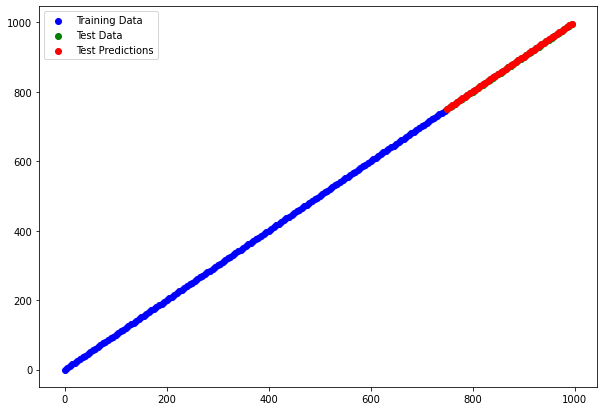

In [32]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize = (10, 7))
plt.scatter(X_reg_train, y_reg_train, c = "b", label = "Training Data")
plt.scatter(X_reg_test, y_reg_test, c = "g", label = "Test Data")
plt.scatter(X_reg_test, y_reg_preds, c = "r", label = "Test Predictions")
plt.legend()

## The missing piece: Non-linearity